In [1]:
import os
from google.colab import drive

# Mount Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the current working directory to Google Drive.
os.chdir('/content/drive/MyDrive/mini project 7022')

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
new_df = pd.read_csv('sns_preprecossed.csv')
new_df


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
1,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,1.067374,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
2,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,2.027874,-0.220399,-0.174905
3,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
4,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,2.273635,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,2.285084,2.719271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
29996,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
29997,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,1.715587,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
29998,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905


In [5]:
X = new_df
X_scaled = StandardScaler().fit_transform(X)  # Scale data

We utilized a preprocessed dataset which was assigned to the dataframe '**new_df**




In [6]:
# Initialize variables for SeCo map
separation_scores = []
cramer_v_scores = []

In [7]:
k_values = range(2, 14)

In [9]:
#parallelize the loop using the Pool class from the multiprocessing library:
from multiprocessing import Pool   
# Perform k-means clustering for each value of k
for k in k_values:
    # Initialize k-means object
    kmeans = KMeans(n_clusters=k, n_init=500, random_state=42)
    
    # Fit k-means object to data
    kmeans.fit(X_scaled)
    # Calculate within-cluster sum of squares
    wcss = kmeans.inertia_
    # Calculate total sum of squares
    total_ssq = np.sum((X_scaled - np.mean(X_scaled, axis=0))**2)
    separation_score = (total_ssq - wcss) / total_ssq
    separation_scores.append(separation_score)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate Cramer's V index of concordance
    n = len(cluster_labels)
    contingency_table = np.zeros((k, k))
    for i in range(n):
        for j in range(i+1, n):
            contingency_table[cluster_labels[i], cluster_labels[j]] += 1
    contingency_table += contingency_table.T
    expected_table = np.outer(np.sum(contingency_table, axis=1), np.sum(contingency_table, axis=0)) / np.sum(contingency_table)
    chi_squared = np.sum((contingency_table - expected_table)**2 / expected_table)
    cramer_v_score = np.sqrt(chi_squared / (n*(min(k, k)-1)))
    cramer_v_scores.append(cramer_v_score)
    
if __name__ == '__main__':
 # Define the k values to process 
   k_value = [2, 3, 4, 5, 6]
    
 # Create a pool of worker processes
   pool = Pool()
    
# Process each k value in parallel
def process_k(k):
   pool.map(process_k, k_value)
    
# Close the pool and wait for all processes to finish
pool.close()
pool.join()

The within-cluster sum of squares (WCSS) is a measure of the variability of the observations within each cluster. In general, a cluster that has a small WCSS is more compact than a cluster that has a large WCSS.

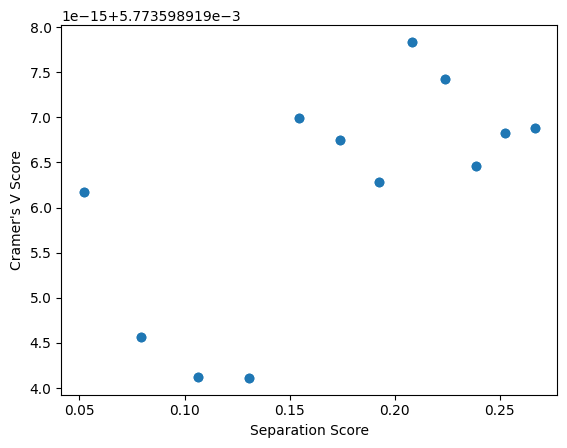

In [10]:
plt.scatter(separation_scores, cramer_v_scores)
plt.xlabel('Separation Score')
plt.ylabel('Cramer\'s V Score')
plt.show()

In [11]:
# Find k value with highest Cramer's V score
best_k = k_values[np.argmax(cramer_v_scores)]
best_k 

9

In [12]:
best_kmeans = KMeans(n_clusters=best_k, n_init=500, random_state=42)
best_kmeans.fit(X_scaled)

KMeans(n_clusters=9, n_init=500, random_state=42)

In [13]:
# Get cluster labels and add to original data
new_df['cluster_label'] = best_kmeans.labels_


In [14]:
y_predict=best_kmeans.fit_predict(X_scaled)



In [25]:
y_predict

array([1, 5, 1, ..., 1, 1, 1], dtype=int32)

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Calculate the Silhouette Score
silhouette = silhouette_score(X_scaled, y_predict)

# Calculate the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, y_predict)

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, y_predict)

# Print the scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.25562293706728884
Calinski-Harabasz Index: 986.4104538840079
Davies-Bouldin Index: 2.340730112606318
